<a href="https://colab.research.google.com/github/643020514-7/643020514-7/blob/main/saveproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prototype

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'hote2' DataFrame has a 'Review' column
reviews = hote2['Review']

# Define a function to remove words with a length less than 2
def remove_less_than_2(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# Apply the function to the 'Review' column and create a new 'Processed_Review' column
hote2['Processed_Review'] = reviews.apply(remove_less_than_2)

# Filter reviews based on ratings
positive_reviews = []
negative_reviews = []  # Modified to store all negative reviews

# Create a SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
for index, row in hote2.iterrows():
    sentiment_scores = sid.polarity_scores(row['Processed_Review'])
    compound_score = sentiment_scores['compound']

    if "not bad" in row['Processed_Review']:
        negative_reviews.append(row['Review'])  # If "not bad" is present, add it to negative reviews
    elif compound_score >= 0.1:
        positive_reviews.append(row['Review'])
    elif compound_score <= -0.1:
        negative_reviews.append(row['Review'])  # All other negative reviews

# Display the filtered reviews based on sentiment analysis
print("\nPositive Reviews:")
for review in positive_reviews:
    print(review)

print("\nNeutral Reviews:")  # No change in neutral reviews

print("\nNegative Reviews:")
for review in negative_reviews:
    print(review)



Positive Reviews:
good nice ,well done i like it
i'm fine it's ok better
good nice i like it's so much ,l love it
good nice ,well done i like it
i'm fine it's ok better
good nice i like it's so much ,l love it

Neutral Reviews:

Negative Reviews:
i think that's not good
so bad #@fk ,have problem
i think that's not good
so bad #@fk ,have problem
good nice i like it's so much ,l love it and not bad


code in project save

In [ ]:

#สร้าง reviews,ratings จาก hotel
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)


# ทำการรวมข้อความของแค่ละreviews คือ positive,negative,neutral โดยใช้ , เป็นตัวคั่นระหว่างข้อความแต่ละรีวิว.
positive_reviews_a = " ".join(df[df['Sentiment'] == 'Positive']['Review'])
negative_reviews_a = " ".join(df[df['Sentiment'] == 'Negative']['Review'])
neutral_reviews_a = " ".join(df[df['Sentiment'] == 'Neutral']['Review'])

# นำข้อความในแต่ละกลุ่มที่รวมไว้แล้วแยกออกมาเป็นรีวิวแต่ละรีวิวด้วยการใช้ , เป็นตัวคั่นและสร้าง DataFrame
aa = positive_reviews_a.split(',')
bb = negative_reviews_a.split(',')
cc = neutral_reviews_a.split(',')
# DataFrame แยกตามกลุ่ม
df_pos = pd.DataFrame({'Review': aa})
df_neg = pd.DataFrame({'Review': bb})
df_neu = pd.DataFrame({'Review': cc})


positive_reviews = []
negative_reviews = []
neutral_reviews = []

sid = SentimentIntensityAnalyzer()

# Zip the three DataFrames together
for review1, review2, review3 in zip(df_pos['Review'], df_neg['Review'],df_neu['Review']):
    # Perform sentiment analysis on each review
    sentiment_scores1 = sid.polarity_scores(review1)
    sentiment_scores2 = sid.polarity_scores(review2)
    sentiment_scores3 = sid.polarity_scores(review3)

    compound_score1 = sentiment_scores1['compound']
    compound_score2 = sentiment_scores2['compound']
    compound_score3 = sentiment_scores3['compound']

    # Combine positive reviews from all three DataFrames
    if compound_score1 >= 0.1:
        positive_reviews.append(review1)
    if compound_score2 >= 0.1:
        positive_reviews.append(review2)
    if compound_score3 >= 0.1:
        positive_reviews.append(review3)

    # Combine negative reviews from all three DataFrames
    if compound_score1 <= -0.1:
        negative_reviews.append(review1)
    if compound_score2 <= -0.1:
        negative_reviews.append(review2)
    if compound_score3 <= -0.1:
        negative_reviews.append(review3)

    # Combine neutral reviews from all three DataFrames
    if -0.1 < compound_score1 < 0.1:
        neutral_reviews.append(review1)
    if -0.1 < compound_score2 < 0.1:
        neutral_reviews.append(review2)
    if -0.1 < compound_score3 < 0.1:
        neutral_reviews.append(review3)

#การทำความสะอาดและlemmatizeข้อความ
# Create a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

#  lemmatize text
def preprocess_and_lemmatize(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Lemmatization
    words = [lemmatizer.lemmatize(word.lower()) for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # ลบอักขระที่ไม่ใช่ตัวอักษร
    words = [re.sub(r'[^a-zA-Z]', '', word) for word in words if word.isalpha()]


    return " ".join(words)

# Apply preprocessing and lemmatization to reviews
positive_reviews = [preprocess_and_lemmatize(review) for review in positive_reviews]
negative_reviews = [preprocess_and_lemmatize(review) for review in negative_reviews]
neutral_reviews = [preprocess_and_lemmatize(review) for review in neutral_reviews]



# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(" ".join(positive_reviews))
negative_freq_dist = word_frequency(" ".join(negative_reviews))
neutral_freq_dist = word_frequency(" ".join(neutral_reviews))


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for positive, negative, and neutral reviews
generate_word_cloud(" ".join(positive_reviews), 'Positive Sentiment Word Cloud')
generate_word_cloud(" ".join(negative_reviews), 'Negative Sentiment Word Cloud')
generate_word_cloud(" ".join(neutral_reviews), 'Neutral Sentiment Word Cloud')

#project 3 save

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Step 1: Define URLs and Titles for Wikipedia Articles
articles = [
    {"urls": [
        "https://en.wikipedia.org/wiki/Artificial_intelligence",
        "https://en.wikipedia.org/wiki/AI_in_video_games",
        "https://en.wikipedia.org/wiki/Artificial_intelligence_in_healthcare"
    ], "title": "Artificial Intelligence"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Machine_learning",
        "https://en.wikipedia.org/wiki/Supervised_learning",
        "https://en.wikipedia.org/wiki/Unsupervised_learning"
    ], "title": "Machine Learning"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Deep_learning",
        "https://en.wikipedia.org/wiki/Convolutional_neural_network",
        "https://en.wikipedia.org/wiki/Recurrent_neural_network"
    ], "title": "Deep Learning"},
]

# Step 2: Retrieve Data from Webpages and Create Word Clouds
for article in articles:
    text_data = ""
    for url in article["urls"]:
        try:
            response = urllib.request.urlopen(url)

            if response.status == 200:
                page_content = response.read()
                soup = BeautifulSoup(page_content, 'html.parser')

                # Extract paragraphs from the article
                paragraphs = soup.find_all('p')

                # Concatenate text from all paragraphs
                for paragraph in paragraphs:
                    text_data += paragraph.text
        except urllib.error.HTTPError as e:
            print(f"HTTPError occurred for URL {url}: {e}")

    # Step 3: Tokenize and Clean Data
    words = word_tokenize(text_data)
    words = [word.lower() for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Step 4: Calculate Word Frequencies
    word_freq_dist = nltk.FreqDist(words)

    # Step 5: Create Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dist)

    # Step 6: Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')

    plt.title(article["title"] + ' Word Cloud (Frequency)')
    plt.axis('off')
    plt.show()


In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Step 1: Define URLs and Titles for Wikipedia Articles
articles = [
    {"urls": [
        "https://en.wikipedia.org/wiki/Artificial_intelligence",
        "https://en.wikipedia.org/wiki/AI_in_video_games",
        "https://en.wikipedia.org/wiki/Artificial_intelligence_in_healthcare"
    ], "title": "Artificial Intelligence"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Machine_learning",
        "https://en.wikipedia.org/wiki/Supervised_learning",
        "https://en.wikipedia.org/wiki/Unsupervised_learning"
    ], "title": "Machine Learning"},
    {"urls": [
        "https://en.wikipedia.org/wiki/Deep_learning",
        "https://en.wikipedia.org/wiki/Convolutional_neural_network",
        "https://en.wikipedia.org/wiki/Recurrent_neural_network"
    ], "title": "Deep Learning"},
]

# Function to process an article and calculate word frequencies
def process_article(urls):
    text_data = ""
    for url in urls:
        try:
            response = urllib.request.urlopen(url)

            if response.status == 200:
                page_content = response.read()
                soup = BeautifulSoup(page_content, 'html.parser')

                # Extract paragraphs from the article
                paragraphs = soup.find_all('p')

                # Concatenate text from all paragraphs
                for paragraph in paragraphs:
                    text_data += paragraph.text
        except urllib.error.HTTPError as e:
            print(f"HTTPError occurred for URL {url}: {e}")

    # Tokenize and Clean Data
    words = word_tokenize(text_data)
    words = [word.lower() for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Calculate Word Frequencies
    word_freq_dist = nltk.FreqDist(words)
    return word_freq_dist

# Process each article and calculate word frequencies
ai_freq_dist = process_article(articles[0]["urls"])
ml_freq_dist = process_article(articles[1]["urls"])
dl_freq_dist = process_article(articles[2]["urls"])

 ###########################################################################################


# Create Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=300).generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()

generate_word_cloud(word_freq_dist, 'Wikipedia Articles Word Cloud')
generate_word_cloud(ai_freq_dist, 'Artificial Intelligence Word Cloud')
generate_word_cloud(ml_freq_dist, 'Machine Learning Word Cloud')
generate_word_cloud(dl_freq_dist, 'Deep Learning Word Cloud')


# Get the top 10 words and their frequencies for each category
ai_top_words, ai_top_freqs = zip(*ai_freq_dist.most_common(10))
ml_top_words, ml_top_freqs = zip(*ml_freq_dist.most_common(10))
dl_top_words, dl_top_freqs = zip(*dl_freq_dist.most_common(10))

# Define colors for each category
ai_color = 'skyblue'
ml_color = 'lightcoral'
dl_color = 'lightgreen'

# Create separate bar charts for each category with different colors
plt.figure(figsize=(18, 6))

# Artificial Intelligence
plt.subplot(131)
plt.bar(ai_top_words, ai_top_freqs, color=ai_color)
plt.title('Artificial Intelligence - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Machine Learning
plt.subplot(132)
plt.bar(ml_top_words, ml_top_freqs, color=ml_color)
plt.title('Machine Learning - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Deep Learning
plt.subplot(133)
plt.bar(dl_top_words, dl_top_freqs, color=dl_color)
plt.title('Deep Learning - Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#save pro 3 long code

#long code

In [ ]:
import urllib.request

# Create a Request object for the webpage you want to retrieve.
request = urllib.request.Request("https://en.wikipedia.org/wiki/Deep_learning")

# Open the Request object using the urlopen() function.
response = urllib.request.urlopen(request)

# Read the response data using the read() method.
data = response.read()

# Close the response object using the close() method.
response.close()

# Print the contents of the webpage.
print(data)


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Deep learning - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enable

In [ ]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the 'punkt' tokenizer data and stopwords (only need to do this once)
nltk.download('punkt')
nltk.download('stopwords')

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(data, 'html.parser')

# Find and extract specific elements from the webpage
# For example, let's extract and print the page title:
page_title = soup.title.string
print("Page Title:", page_title)

# Find and extract all paragraphs from the webpage
paragraphs = soup.find_all('p')

# Initialize a list to store the cleaned text
cleaned_text = []

# Iterate through the paragraphs
for paragraph in paragraphs:
    # Tokenize the paragraph into words
    words = word_tokenize(paragraph.text)

    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    # Append the cleaned text to the list
    cleaned_text.append(filtered_text)

# Join the cleaned text paragraphs into a single string
final_cleaned_text = ' '.join(cleaned_text)

# Print the cleaned text
print("Cleaned Text (Stopwords Removed):", final_cleaned_text)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Page Title: Deep learning - Wikipedia
Cleaned Text (Stopwords Removed): Deep learning part broader family machine learning methods , based artificial neural networks representation learning . adjective `` deep '' deep learning refers use multiple layers network . Methods used either supervised , semi-supervised unsupervised . [ 2 ] Deep-learning architectures deep neural networks , deep belief networks , deep reinforcement learning , recurrent neural networks , convolutional neural networks transformers applied fields including computer vision , speech recognition , natural language processing , machine translation , bioinformatics , drug design , medical image analysis , climate science , material inspection board game programs , produced results comparable cases surpassing human expert performance . [ 3 ] [ 4 ] [ 5 ] Artificial neural networks ( ANNs ) inspired information processing distributed communication nodes biological systems . ANNs various differences biological brains . Spe

In [ ]:
import re



# Split the text into words (tokens) using whitespace as the delimiter
words =final_cleaned_text.split()

# Remove non-alphabet characters from each word using regular expressions
words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

# Print the split words without non-alphabet characters
for word in words:
    if word:  # Check if the word is not empty after removing non-alphabet characters
        print(word)


In [ ]:
from collections import Counter

# Split the text into words (tokens) using whitespace as the delimiter
words = final_cleaned_text.split()

# Remove non-alphabet characters from each word using regular expressions
words = [re.sub(r'[^a-zA-Z]', '', word) for word in words]

# Create a Counter object to count word frequencies
word_freq = Counter(words)

# Print the word frequencies
for word, freq in word_freq.items():
    if word:  # Check if the word is not empty after removing non-alphabet characters
        print(f"Word: {word}, Frequency: {freq}")


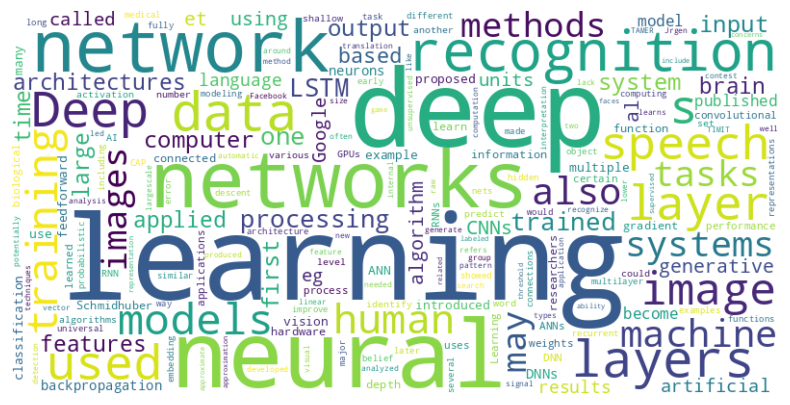

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you already have the word frequencies in the word_freq dictionary

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud image from the word frequencies
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels
plt.show()
